In [3]:
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

ModuleNotFoundError: No module named 'spectralradex'

In [ ]:
# parameter box

md = 100  # molecular density (cm^-3)
cd = 10**15  # column density (cm^-2)
T = 500  # temperature (Kelvin)

In [ ]:
radex_params = spectralradex.radex.get_default_parameters()

radex_params["cdmol"] = 1e16
radex_params["p-h2"] = 1e4
radex_params["o-h2"] = 1e4

radex_params["linewidth"] = 10
radex_params["fmax"] = 300

print(radex_params)

{'molfile': 'co.dat', 'tkin': 30.0, 'tbg': 2.73, 'cdmol': 1e+16, 'h2': 100000.0, 'h': 0.0, 'e-': 0.0, 'p-h2': 10000.0, 'o-h2': 10000.0, 'h+': 0.0, 'linewidth': 10, 'fmin': 0.0, 'fmax': 300, 'geometry': 1}


In [ ]:
frequencies = np.arange(80, 300, 0.005)
v0 = 0.0
spectrum = spectralradex.model_spectrum(frequencies, v0, radex_params)

/usr/local/lib/python3.11/dist-packages/spectralradex/__init__.py:179: RuntimeWarning: invalid value encountered in divide
  rad_weights=np.sum(rad_weights,axis=0)/taus


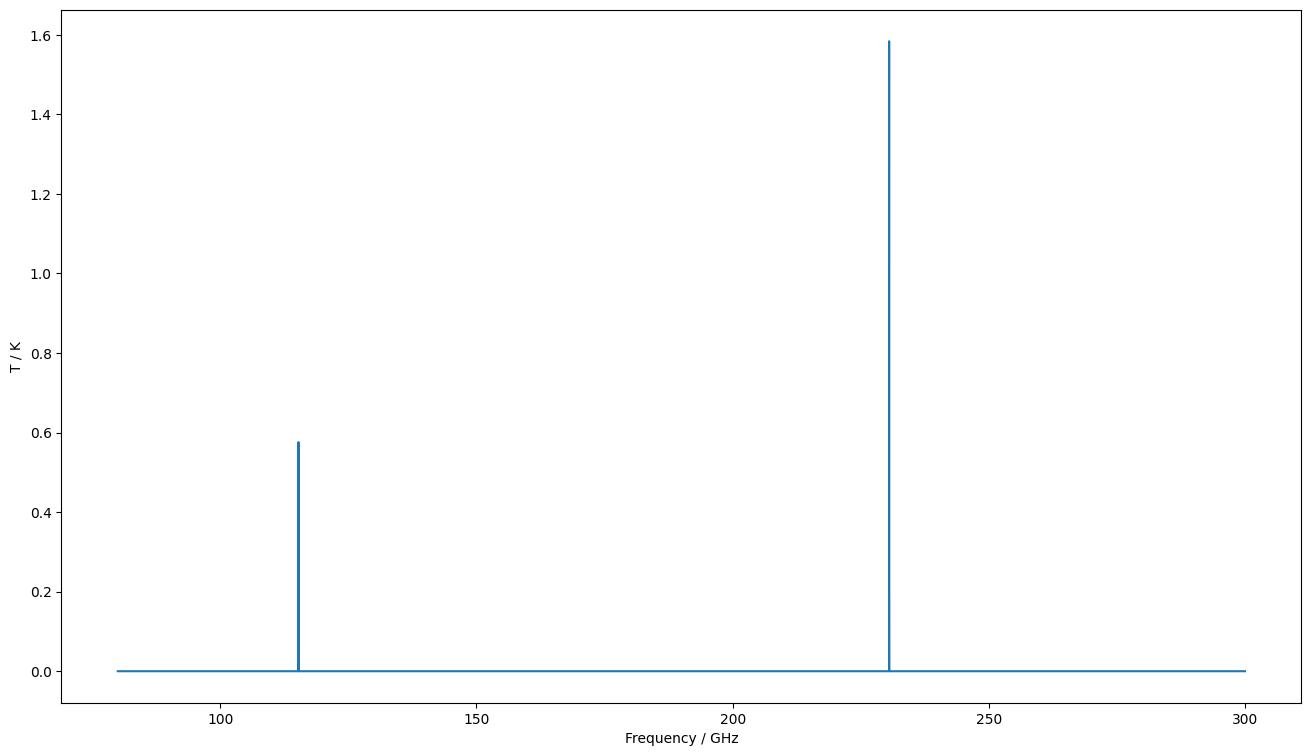

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(spectrum["Frequency"], spectrum["Intensity"], drawstyle="steps-mid")
settings = ax.set(xlabel="Frequency / GHz", ylabel="T / K")

/usr/local/lib/python3.11/dist-packages/spectralradex/__init__.py:179: RuntimeWarning: invalid value encountered in divide
  rad_weights=np.sum(rad_weights,axis=0)/taus


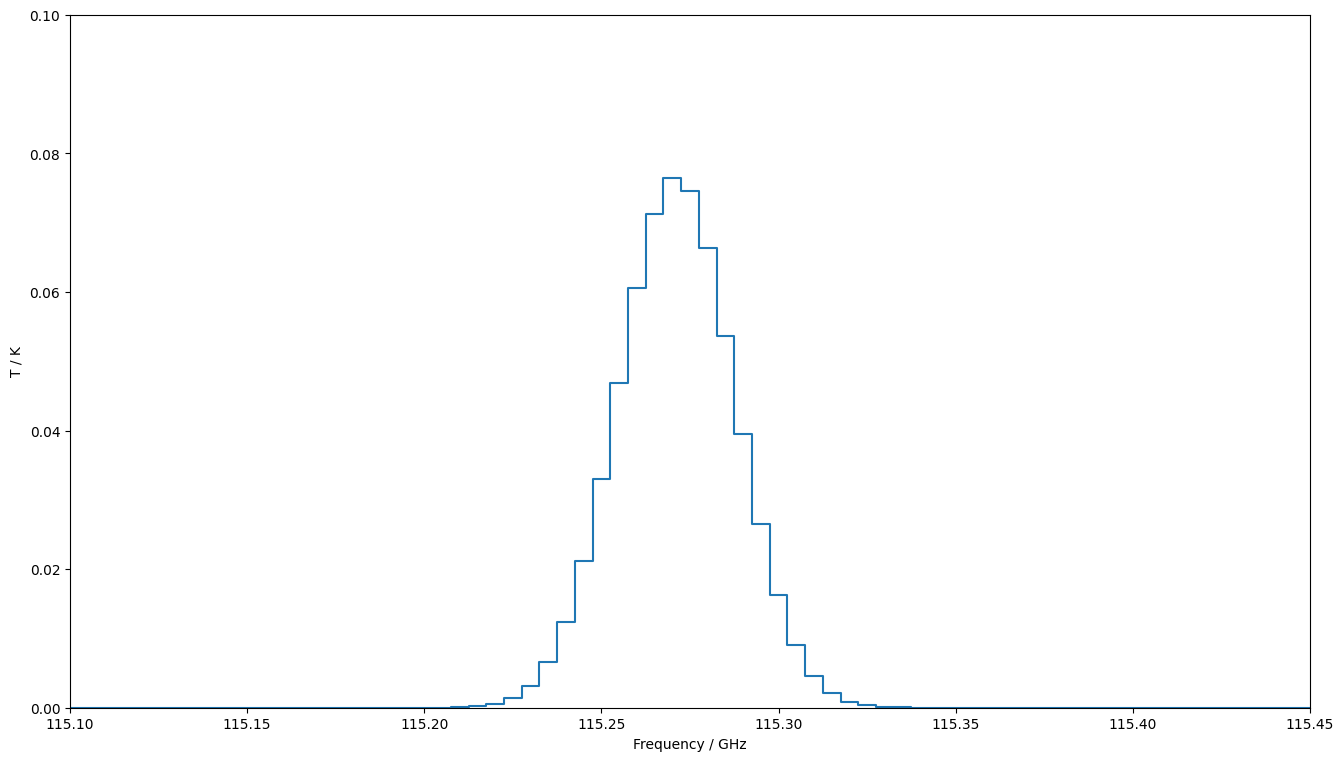

In [ ]:
# zoomed in spectral graph
radex_params["linewidth"] = 100
spectrum = spectralradex.model_spectrum(frequencies, v0, radex_params)
fig, ax = plt.subplots(figsize=(16, 9))
ax.plot(spectrum["Frequency"], spectrum["Intensity"], drawstyle="steps-mid")
settings = ax.set(xlim=(115.1, 115.45), ylim=(0, 0.1), xlabel="Frequency / GHz", ylabel="T / K")


*   Hydrogen density seems could be descibe by two parameters: Para-H2 density and Ortho-H2 density.
*   central velocity is optional, someone use it because he said he need a velocity offset (didn't fully understand)
*   Radex assumes it is always to be Non-LTE






In [ ]:
# Define frequency range (GHz)
frequencies = np.arange(80, 300, 0.005)
v0 = 0.0  # Reference velocity

# slab geometry --means we have to define column density
slab_params = spectralradex.radex.get_default_parameters()

# increase this would get higher peaks
slab_params["cdmol"] = 1e16  # Column density (cm^-2)

# increase those two would get stronger lines (by stronger lines, I mean: ──██──██──██── )
slab_params["p-h2"] = 1e4  # Para-H2 density (cm^-3)
slab_params["o-h2"] = 1e4  # Ortho-H2 density (cm^-3)

# increase this would give more lines appear at high GHz
slab_params["tkin"] = 100  # Kinetic temperature (K)

# increase this would give broad peaks
slab_params["linewidth"] = 50  # Linewidth (km/s)

# Compute slab spectrum
spectrum_slab = spectralradex.model_spectrum(frequencies, v0, slab_params)

/usr/local/lib/python3.11/dist-packages/spectralradex/__init__.py:179: RuntimeWarning: invalid value encountered in divide
  rad_weights=np.sum(rad_weights,axis=0)/taus


In [ ]:
# this would examine whether will the calculation fail
try:
    spectrum_slab = spectralradex.model_spectrum(frequencies, v0, slab_params)
except Exception as e:
    print(f"Error in spectrum calculation: {e}")
    spectrum_slab = None

/usr/local/lib/python3.11/dist-packages/spectralradex/__init__.py:179: RuntimeWarning: invalid value encountered in divide
  rad_weights=np.sum(rad_weights,axis=0)/taus


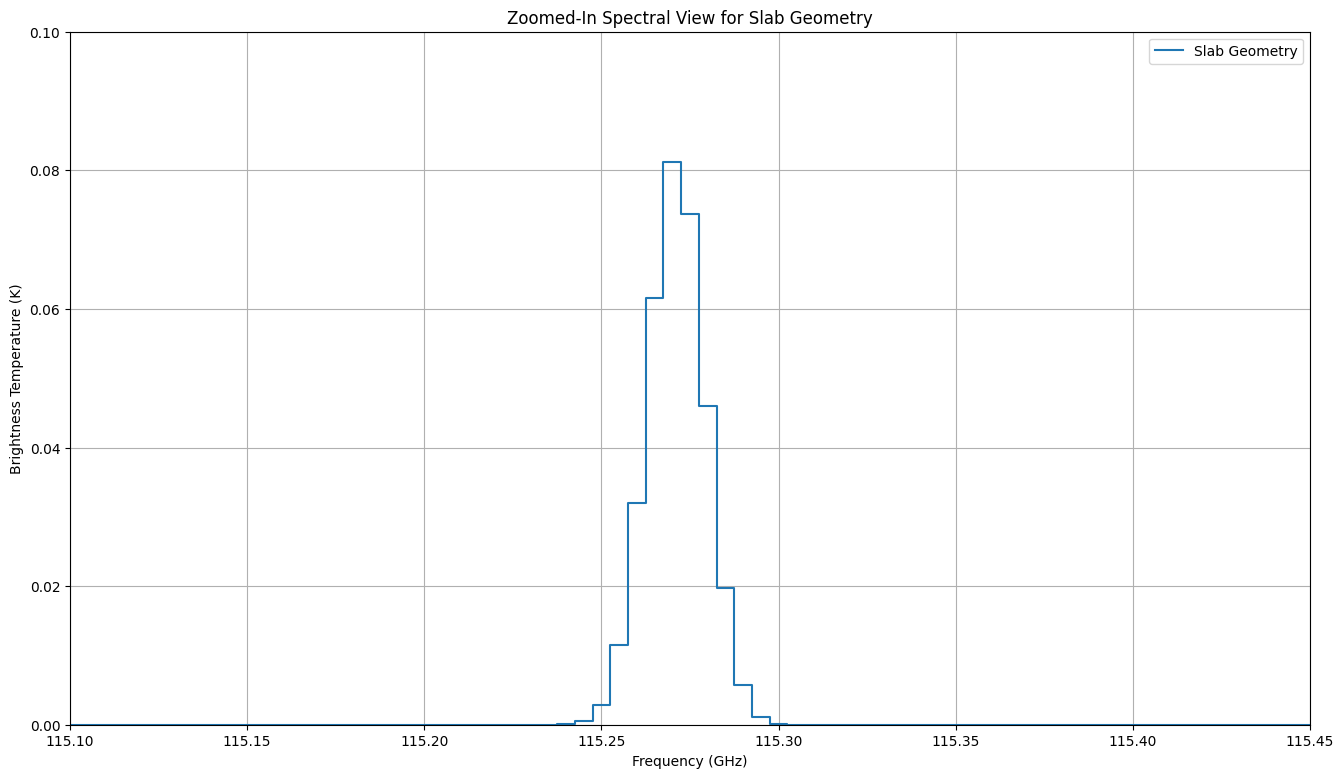

In [ ]:
# zoomed in ploted graph
if spectrum_slab is not None:
    fig, ax = plt.subplots(figsize=(16, 9))

    # Plot slab spectrum with zoomed-in range
    ax.plot(
        spectrum_slab["Frequency"],
        spectrum_slab["Intensity"],
        drawstyle="steps-mid",
        label="Slab Geometry",
    )

    # Zoom into a specific frequency range (115.1 GHz - 115.45 GHz)
    ax.set_xlim(115.1, 115.45)  # Adjust X-axis range to zoom in
    ax.set_ylim(0, 0.1)  # Adjust Y-axis range for better visibility
    ax.set_xlabel("Frequency (GHz)")
    ax.set_ylabel("Brightness Temperature (K)")
    ax.set_title("Zoomed-In Spectral View for Slab Geometry")
    ax.legend()
    ax.grid(True)

    plt.show()
else:
    print("No spectrum generated due to calculation errors.")

plt.show()



*   We need to use volumn density for sphere instead of column density
*   consider to use tau which represents optical length.
*   Small tau (τ ≪ 1) → Optically thin → Most radiation escapes, little absorption.
*   Large tau (τ ≫ 1) → Optically thick → Strong absorption
*   If tau is too high, photons get trapped, leading to flattened peaks.



In [ ]:
# Sphere geometry -- means we define volume density instead of column density
sphere_params = spectralradex.radex.get_default_parameters()

# Increase this would get higher peaks (more molecules available)
sphere_params["h2"] = 3e6  # Volume density (cm^-3)

sphere_params["p-h2"] = 2e4
sphere_params["o-h2"] = 2e4

# Optical depth affects self-absorption
sphere_params["tau"] = 1  # Increase to simulate optically thick medium

sphere_params["tkin"] = 100  # Kinetic temperature (K)

sphere_params["linewidth"] = 50  # Linewidth (km/s)

In [ ]:
# Compute sphere spectrum
try:
    spectrum_sphere = spectralradex.model_spectrum(frequencies, v0, sphere_params)
except Exception as e:
    print(f"Error in spectrum calculation: {e}")
    spectrum_sphere = None

/usr/local/lib/python3.11/dist-packages/spectralradex/__init__.py:179: RuntimeWarning: invalid value encountered in divide
  rad_weights=np.sum(rad_weights,axis=0)/taus


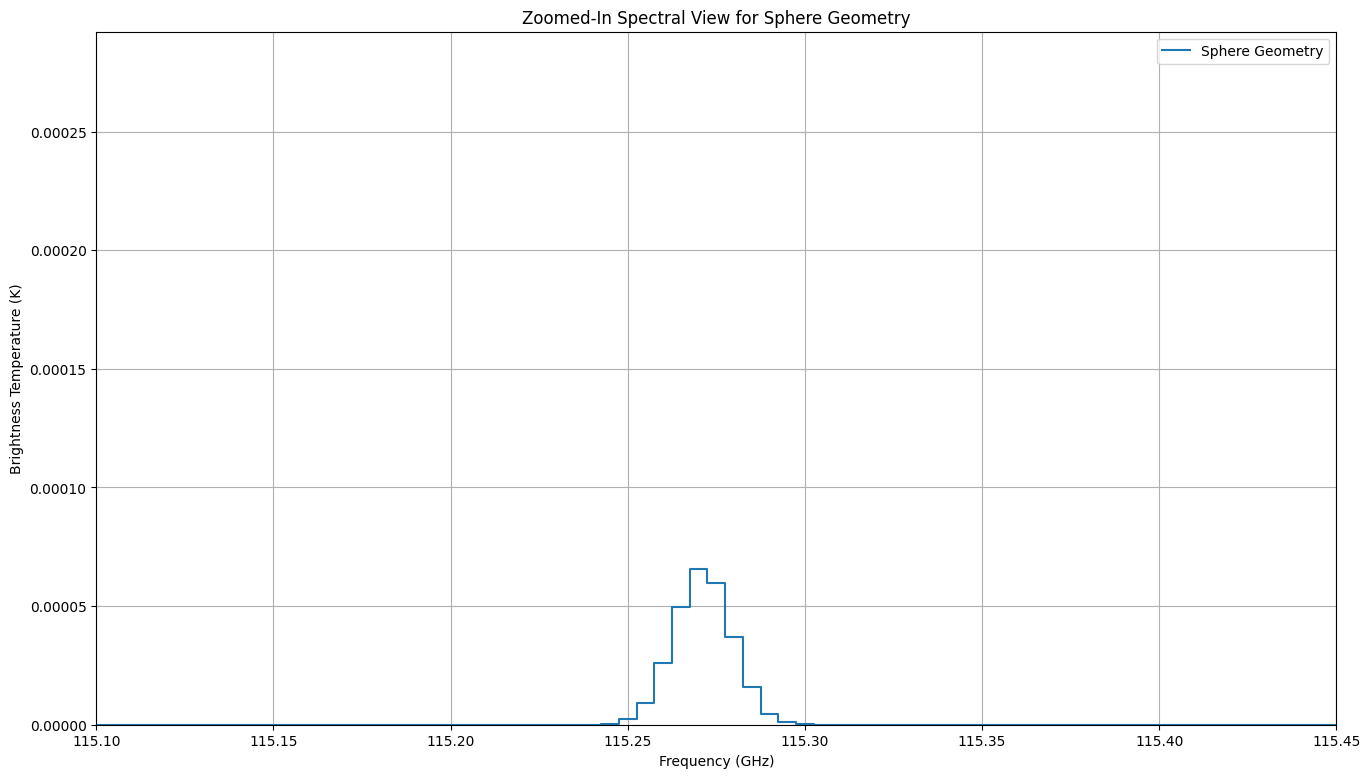

In [ ]:
if spectrum_sphere is not None:
    fig, ax = plt.subplots(figsize=(16, 9))

    # Plot sphere spectrum with zoomed-in range
    ax.plot(
        spectrum_sphere["Frequency"],
        spectrum_sphere["Intensity"],
        drawstyle="steps-mid",
        label="Sphere Geometry",
    )

    # Zoom into a specific frequency range (115.1 GHz - 115.45 GHz)
    ax.set_xlim(115.1, 115.45)  # Adjust X-axis range to zoom in
    ax.set_ylim(0, max(spectrum_sphere["Intensity"]) * 1.2)  # Auto-scale Y-axis

    # Customize plot
    ax.set_xlabel("Frequency (GHz)")
    ax.set_ylabel("Brightness Temperature (K)")
    ax.set_title("Zoomed-In Spectral View for Sphere Geometry")
    ax.legend()
    ax.grid(True)

    # Show the plot
    plt.show()
else:
    print("No spectrum generated due to calculation errors.")